In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('/Users/arman/Skripsi/Dataset/BigData/Fix/Piala-Dunia-Label-Clean.csv')
df = df.drop(labels="Unnamed: 0", axis=1)
df

,Steming,Label
0,lupa gagal tuan rumah piala dunia mari tata se...,negatif
1,gagal helat piala dunia indonesia jadi alam de...,positif
2,citra bela palestina guna syal palestina baca ...,negatif
3,tuan rumah piala dunia bentar tuan rumah wbg,netral
4,ketua erick thohir alas fifa batal posisi indo...,netral
...,...,...
14802,piala dunia batal gelar indonesia,netral
14803,juang indonesia tuan rumah piala dunia siasia,negatif
14804,guru indonesia tuan rumah piala dunia nasib sa...,netral
14805,main timnas indonesia ramai ramai tumpah kecew...,negatif


In [3]:
pd.value_counts(df['Label'])

negatif    6769
positif    4946
netral     3092
Name: Label, dtype: int64

## Split Dataset

In [4]:
# Split into train and test data

train_X, test_X, train_Y, test_Y = model_selection.train_test_split(df['Steming'], df['Label'], test_size = 0.2, random_state = 0)
# random_state = 0 menyatakan tidak ada pengacakan pada data yang di split yang artinya urutanny

In [5]:
# Membuat data frame dari hasil split
df_train80 = pd.DataFrame()
df_train80['Steming'] = train_X
df_train80['Label'] = train_Y

df_test20 = pd.DataFrame()
df_test20['Steming'] = test_X
df_test20['Label'] = test_Y

In [6]:
#Data frame train hasil pembagian 
df_train80

,Steming,Label
13944,indonesia batal tuan rumah piala dunia jelas fifa,negatif
6807,sepakbola rubicon timnas masuk final piala dun...,positif
6629,ahy sentil gagal piala dunia ahy dukung timnas,negatif
5970,ahy sentil perintah piala dunia batal pakai na...,positif
11160,indonesia batal tuan rumah piala dunia,negatif
...,...,...
13123,indonesia batal tuan rumah piala dunia bukti b...,negatif
3264,piala dunia bangkit sepak bola indonesia hancu...,positif
9845,apa laksana final piala dunia laksana indonesi...,negatif
10799,klik bola gol berita kini nyata presiden jokow...,positif


In [7]:
#Data Frame test Hasil Pembagian
df_test20

,Steming,Label
3017,lapang kerja potensi putar uang gera garagara ...,positif
14806,politikus budiman sudjatmiko tolak timnas isra...,positif
3299,juang erick thohir apresiasi keringat air mata...,positif
7443,arah jokowi coret ri tuan rumah piala dunia,netral
12133,batal piala dunia main politik pk mancing kepa...,netral
...,...,...
7885,indonesia batal gelar fifa piala dunia gianni ...,negatif
12603,sedih alas piala dunia batal gelar indonesia,negatif
6038,ahy sesal indonesia batal selenggara piala dun...,netral
5827,gercep argentina sodor proposal ganti indonesi...,netral


In [8]:
df_test20.to_csv('/Users/arman/Skripsi/Dataset/PembagianDataset/df_test20.csv')

## Pembobotan TF-IDF

In [9]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect_8020 = TfidfVectorizer()
tfidf_vect_8020.fit(df['Steming'])
train_X_tfidf_8020 = tfidf_vect_8020.transform(df_train80['Steming'])
test_X_tfidf_8020 = tfidf_vect_8020.transform(df_test20['Steming'])

In [10]:
print(train_X_tfidf_8020.shape)
print(test_X_tfidf_8020.shape)

(11845, 9987)
(2962, 9987)


In [11]:
# You can use the below syntax to see the vocabulary that it has learned from the corpus
print(tfidf_vect_8020.vocabulary_)

{'lupa': 5041, 'gagal': 2587, 'tuan': 9323, 'rumah': 7686, 'piala': 6940, 'dunia': 2146, 'mari': 5226, 'tata': 8875, 'sepak': 8127, 'bola': 1148, 'indonesia': 3384, 'depan': 1778, 'kelam': 4169, 'mata': 5280, 'internasional': 3526, 'anti': 369, 'jajah': 3680, 'sinar': 8296, 'persepakbolaan': 6874, 'helat': 3105, 'jadi': 3660, 'alam': 195, 'dewasa': 1816, 'bangun': 702, 'semangat': 8052, 'tanah': 8811, 'air': 124, 'cinta': 1498, 'sepakbola': 8130, 'kuat': 4642, 'milik': 5590, 'respons': 7563, 'citra': 1511, 'bela': 856, 'palestina': 6547, 'guna': 2916, 'syal': 8720, 'baca': 580, 'buku': 1281, 'kait': 3956, 'sok': 8428, 'duluan': 2137, 'ganjar': 2637, 'kurang': 4677, 'tapi': 8851, 'pas': 6641, 'diam': 1829, 'kontradiktif': 4535, 'bentar': 908, 'wbg': 9762, 'ketua': 4319, 'erick': 2334, 'thohir': 9091, 'alas': 200, 'fifa': 2465, 'batal': 770, 'posisi': 7112, 'lanjut': 4783, 'ajang': 135, 'situasi': 8342, 'kini': 4366, 'deret': 1788, 'nyata': 6317, 'bijak': 1048, 'pranowo': 7158, 'tuai': 9

## Penerapan Model SVM

## Kernel Linear

In [12]:
from sklearn.svm import SVC

#Menerapkan pemodelan SVM pada data train
model = SVC(kernel='linear', 
            decision_function_shape='ovr',
           C=1.0)
clf = model.fit(train_X_tfidf_8020,train_Y)



# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
#     kernel='linear', max_iter=-1, probability=False, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

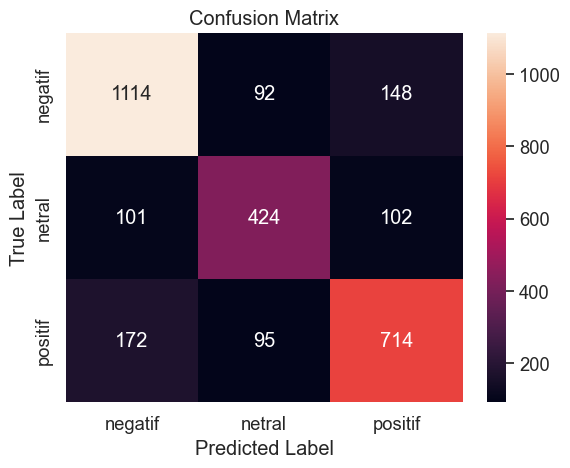

In [13]:
# Proses Pengujian
predictions_SVM_8020 = clf.predict(test_X_tfidf_8020)

from sklearn.metrics import confusion_matrix
#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_8020), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [14]:
# Accuracy, Precision, Recall, f1-score
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from sklearn.metrics import classification_report

print (classification_report(test_Y, predictions_SVM_8020))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_8020))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_8020, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_8020, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_8020, average='macro'))



              precision    recall  f1-score   support

     negatif       0.80      0.82      0.81      1354
      netral       0.69      0.68      0.68       627
     positif       0.74      0.73      0.73       981

    accuracy                           0.76      2962
   macro avg       0.75      0.74      0.74      2962
weighted avg       0.76      0.76      0.76      2962

Accuracy of the model :  0.7602970965563808
Precision of the model:  0.7459268560937572
Recall of the model:  0.7422707353003123
F1-score of the model:  0.7440026757286521


## Kernel Poly

In [15]:

#Menerapkan pemodelan SVM pada data train
modelpoly = SVC(kernel='poly', 
            decision_function_shape='ovr')
clfpoly = modelpoly.fit(train_X_tfidf_8020,train_Y)

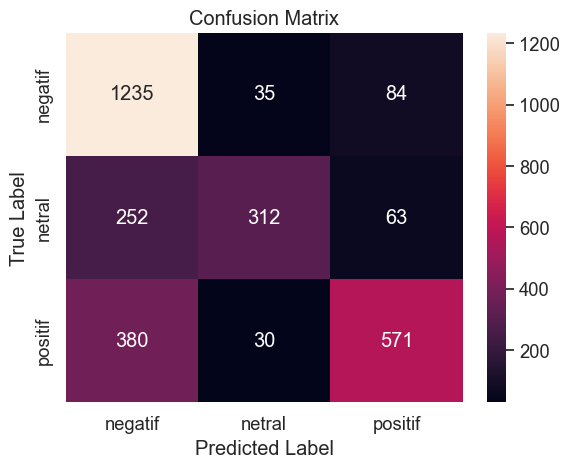

In [16]:
# Proses Pengujian
predictions_SVM_8020_poly = clfpoly.predict(test_X_tfidf_8020)

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_8020_poly), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     

In [17]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_8020_poly))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_8020_poly))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_8020_poly, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_8020_poly, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_8020_poly, average='macro'))



              precision    recall  f1-score   support

     negatif       0.66      0.91      0.77      1354
      netral       0.83      0.50      0.62       627
     positif       0.80      0.58      0.67       981

    accuracy                           0.72      2962
   macro avg       0.76      0.66      0.69      2962
weighted avg       0.74      0.72      0.70      2962

Accuracy of the model :  0.7150573936529372
Precision of the model:  0.7614466168899577
Recall of the model:  0.6639263462721258
F1-score of the model:  0.6868388779544655


## Kernel RBF

In [18]:

#Menerapkan pemodelan SVM pada data train
modelRBF = SVC(kernel='rbf', 
            decision_function_shape='ovr')
clfRBF = modelRBF.fit(train_X_tfidf_8020,train_Y)

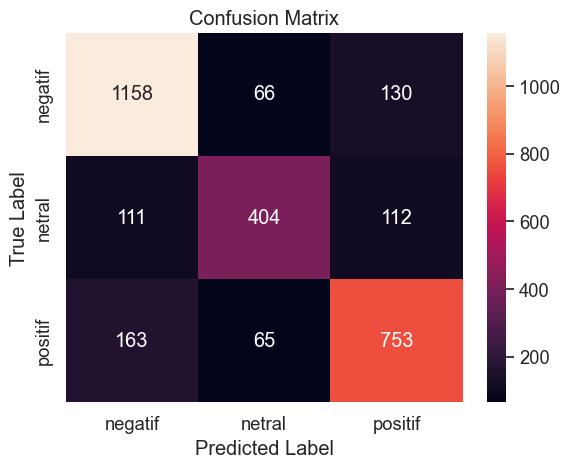

In [19]:
# Proses Pengujian
predictions_SVM_8020_RBF = clfRBF.predict(test_X_tfidf_8020)

#confusion Matrix

class_label = ["negatif","netral","positif"]
df_cm = pd.DataFrame(confusion_matrix(test_Y, predictions_SVM_8020_RBF), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
     
    

In [20]:
# Accuracy, Precision, Recall, f1-score
print (classification_report(test_Y, predictions_SVM_8020_RBF))

print("Accuracy of the model : ", accuracy_score(test_Y, predictions_SVM_8020_RBF))
print('Precision of the model: ', precision_score(test_Y, predictions_SVM_8020_RBF, average='macro'))
print('Recall of the model: ', recall_score(test_Y, predictions_SVM_8020_RBF, average='macro'))
print('F1-score of the model: ', f1_score(test_Y, predictions_SVM_8020_RBF, average='macro'))



              precision    recall  f1-score   support

     negatif       0.81      0.86      0.83      1354
      netral       0.76      0.64      0.70       627
     positif       0.76      0.77      0.76       981

    accuracy                           0.78      2962
   macro avg       0.77      0.76      0.76      2962
weighted avg       0.78      0.78      0.78      2962

Accuracy of the model :  0.7815665091154625
Precision of the model:  0.773527774796991
Recall of the model:  0.7557219793953132
F1-score of the model:  0.7629326476104756


In [21]:
print("Accuracy of the model RBF : ", accuracy_score(test_Y, predictions_SVM_8020_RBF))
print("Accuracy of the model POLY: ", accuracy_score(test_Y, predictions_SVM_8020_poly))
print("Accuracy of the model LINEAR: ", accuracy_score(test_Y, predictions_SVM_8020))

Accuracy of the model RBF :  0.7815665091154625
Accuracy of the model POLY:  0.7150573936529372
Accuracy of the model LINEAR:  0.7602970965563808
